In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
c = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')
c.head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [23]:
# looking for any correlation among features
c.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


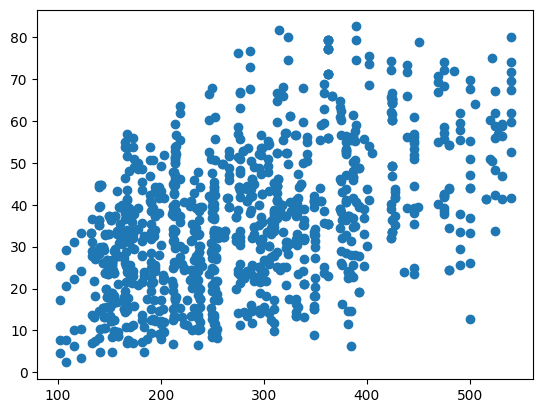

In [22]:
# understanding the data
plt.scatter(c['cement'], c['concrete_compressive_strength'])

In [5]:
c.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
X = c[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']]
y = c['concrete_compressive_strength']

In [7]:
mms = MinMaxScaler()

In [8]:
X = mms.fit_transform(X)

In [20]:
# training the model using train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)
X_train


array([[0.62557078, 0.        , 0.        , ..., 0.58866279, 0.42247868,
        0.07417582],
       [0.74315068, 0.13216472, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       [0.52283105, 0.        , 0.        , ..., 0.65116279, 0.56949323,
        0.07417582],
       ...,
       [0.63356164, 0.42070117, 0.        , ..., 0.96889535, 0.02759659,
        0.00549451],
       [0.52739726, 0.        , 0.        , ..., 0.37848837, 0.62368289,
        0.24450549],
       [0.01438356, 0.45186422, 0.        , ..., 0.39883721, 0.63973909,
        0.01648352]])

In [10]:
rgr = RandomForestRegressor()


In [12]:
model = rgr.fit(X_train, y_train)
model

RandomForestRegressor()

In [13]:
n_estimators= [int(x) for x in np.linspace(start=300, stop = 2000, num = 10)]

max_features=['auto', 'sqrt', 'log2']

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

min_samples_split=[2, 5, 10, 14]

min_samples_leaf=[1, 2, 4, 6, 8]

random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                 'min_samples_leaf':min_samples_leaf,
                 }
print(random_grid)


{'n_estimators': [300, 488, 677, 866, 1055, 1244, 1433, 1622, 1811, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [14]:
rsv = RandomizedSearchCV(estimator=rgr,param_distributions=random_grid, n_iter=50, cv = 3, random_state=100)
rsv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [300, 488, 677, 866,
                                                         1055, 1244, 1433, 1622,
                                                         1811, 2000]},
                   random_state=100)

In [18]:
#finding best parameters for the model
rsv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 450}

In [26]:
#trail and error method on selecting paramenters, generating a model, score
rfr = RandomForestRegressor(n_estimators=677, max_depth=10, max_features='auto' )
model_1 = rfr.fit(X_train,y_train)
print(model_1.score(X_train,y_train))
print(model_1.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9807395848124507
0.9151760920297496


In [25]:
# predictions based on the model created
predictions = model_1.predict(X_test)
print(predictions)


[13.85642974 25.8232229  33.02179993 53.43662065 13.64309666 34.80815256
 40.04293111 29.69389557 43.25252482 28.44376375 31.73947724 25.5833802
 25.12684204 60.8130997  51.52885645 12.44490301 22.41350589 35.16840265
 29.09155983 43.64398676 39.52661917 38.00620881 35.61170108 27.82971938
 25.10426795 12.37287152 26.56034549 37.24796407 36.00319518 51.79835323
 17.72191982 46.9820497  17.22094992 45.2652386  59.79662871 35.52535933
 40.06549109 42.48314402 17.62087352 53.35815003 10.92539792 14.66326727
 29.86457147 13.51464305 41.02036906 41.28624518 19.01094057 11.92132202
 36.83114408 11.78159103 28.54847106 23.67868113 59.85159124  4.81851336
 24.11327947 17.71734166 11.98919167 50.50041507 33.43625317 20.50703969
 49.26960173 36.39520884 30.13373601 38.38668667 13.92208428 39.89391816
 20.03205056 40.81546032 23.90081139 44.3515412  70.9107434  11.59206209
 69.57210679 45.64054694 52.83938702 39.92073812 24.16521119 33.02833346
 53.51760035 28.75955919 23.42163267 54.53127908 13.

In [27]:
# prompt: save the model to file using pickle

import pickle

# Save the model to a file using pickle
with open('/content/drive/MyDrive/concrete_model.pkl', 'wb') as f:
  pickle.dump(model_1, f)


In [29]:
model_1.score(X_test,y_test)


0.9151760920297496

In [31]:
# prompt: apply the model to a data

# Load the model from the file using pickle
with open('/content/drive/MyDrive/concrete_model.pkl', 'rb') as f:
  model_1 = pickle.load(f)

# Prepare the data
data = [[300, 100, 100, 200, 10, 1000, 800, 28]]

# Apply the model to the data
predictions = model_1.predict(data)

# Print the predictions
print(predictions)


[64.08366164]
